In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning models
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, SVR
from sklearn.impute import SimpleImputer
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [10]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")

In [11]:
data.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [13]:
data.describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  8350.000000  8365.000000  8185.000000  4913.000000  4431.000000   
mean     13.193305    23.859976     2.805913     5.389395     7.632205   
std       5.403596     6.136408    10.459379     5.044484     3.896235   
min      -2.000000     8.200000     0.000000     0.000000     0.000000   
25%       9.200000    19.300000     0.000000     2.600000     4.750000   
50%      13.300000    23.300000     0.000000     4.600000     8.700000   
75%      17.400000    28.000000     1.000000     7.000000    10.700000   
max      28.500000    45.500000   371.000000   145.000000    13.900000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    7434.000000   8349.000000   8318.000000  8366.000000  8323.000000   
mean       40.174469     13.847646     18.533662    67.822496    51.249790   
std        14.665721     10.174579      9.766986    16.833283    18.423774   
min         7.000000      0.000000      0.000000    10.000000     6.000000   
25%        30.000000      6.000000     11.000000    56.000000    39.000000   
50%        39.000000     13.000000     19.000000    68.000000    51.000000   
75%        50.000000     20.000000     24.000000    80.000000    63.000000   
max       107.000000     63.000000     83.000000   100.000000    99.000000   

       Pressure9am  Pressure3pm     Cloud9am     Cloud3pm      Temp9am  \
count  7116.000000  7113.000000  6004.000000  5970.000000  8369.000000   
mean   1017.640233  1015.236075     4.566622     4.503183    17.762015   
std       6.828699     6.766681     2.877658     2.731659     5.627035   
min     989.800000   982.900000     0.000000     0.000000     1.900000   
25%    1013.000000  1010.400000     1.000000     2.000000    13.800000   
50%    1017.700000  1015.300000     5.000000     5.000000    17.800000   
75%    1022.300000  1019.800000     7.000000     7.000000    21.900000   
max    1039.000000  1036.000000     8.000000     8.000000    39.400000   

           Temp3pm  
count  8329.000000  
mean     22.442934  
std       5.980020  
min       7.300000  
25%      18.000000  
50%      21.900000  
75%      26.400000  
max      44.100000

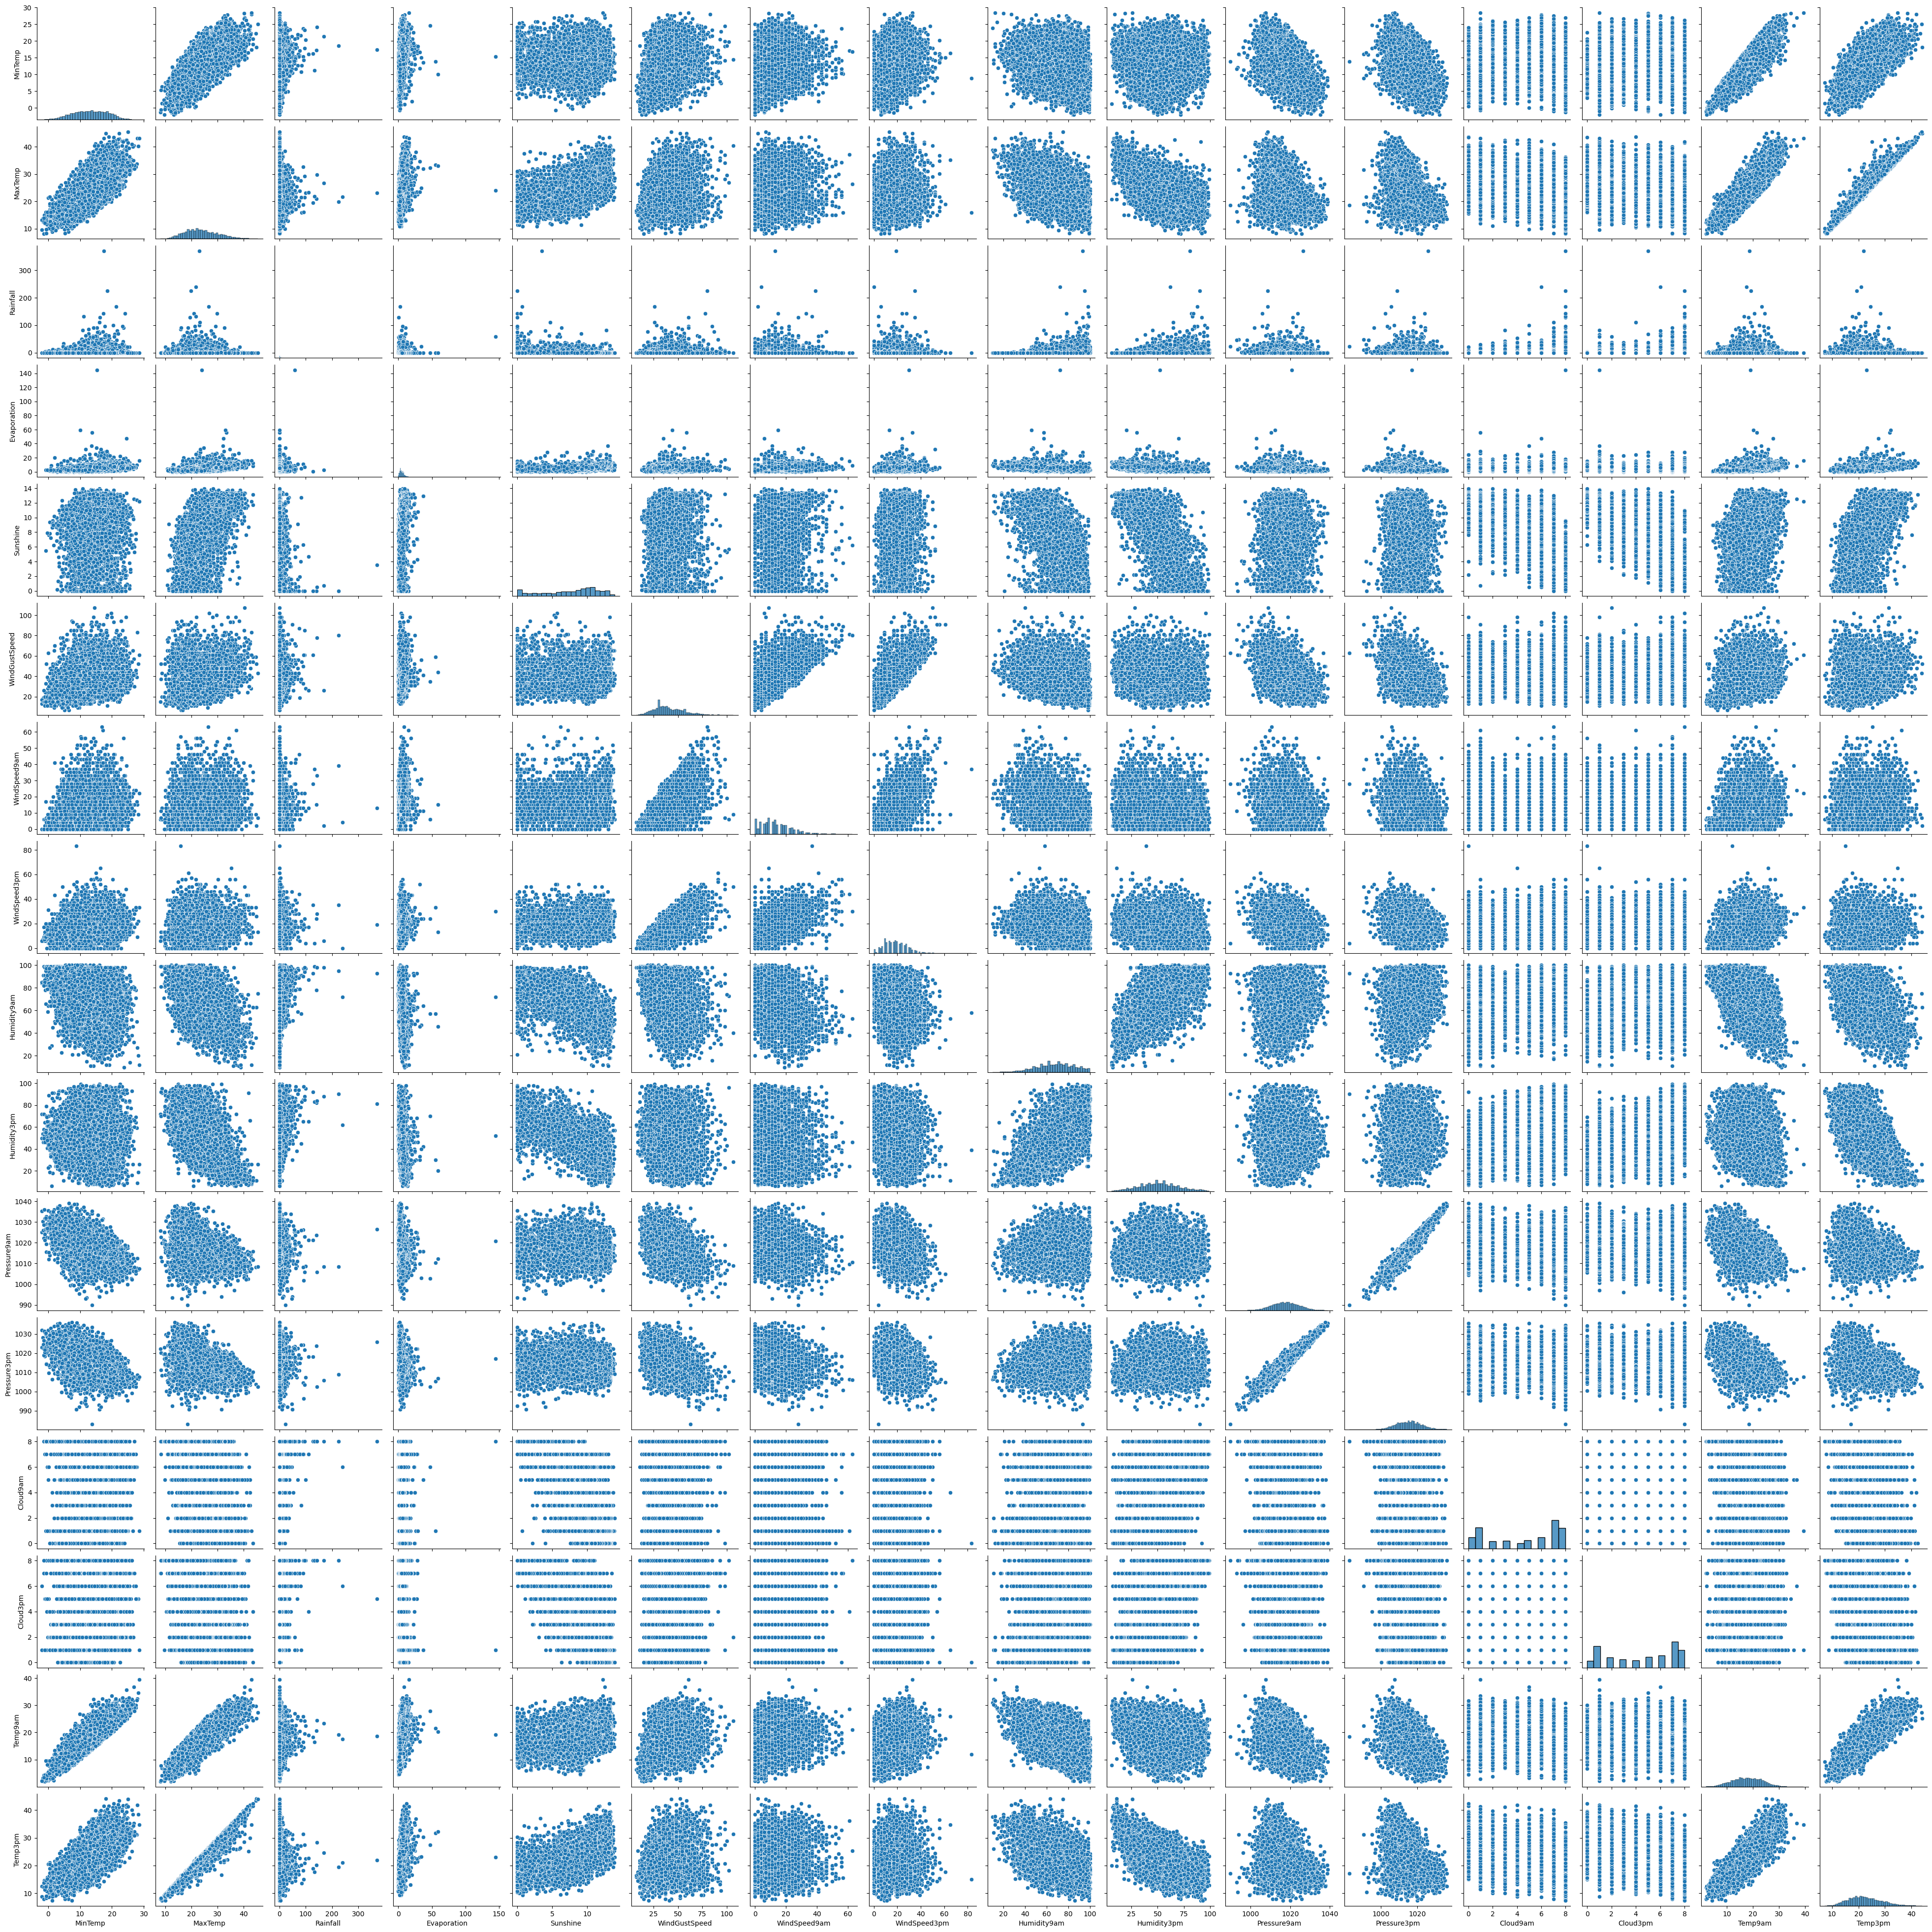

In [14]:
sns.pairplot(data)
plt.show()

In [15]:
data.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

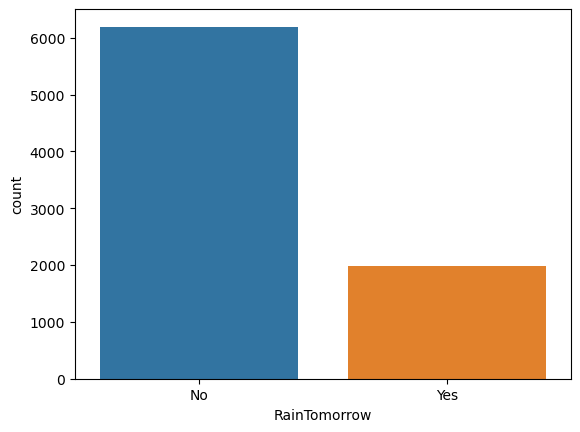

In [16]:
sns.countplot(x='RainTomorrow', data=data)
plt.show()

In [17]:
# Convert Date column to datetime
data['Date'] = pd.to_datetime(data['Date'])

In [18]:
# Extract features from Date (e.g., month, day)
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

In [19]:
# Drop unnecessary columns (e.g., Date, Location, etc.)
data.drop(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], axis=1, inplace=True)


In [20]:
# Handle categorical variables (e.g., one-hot encoding)
data = pd.get_dummies(data, drop_first=True)

In [23]:
# Split data into features and target variable
X = data.drop('RainTomorrow_Yes', axis=1)
y = data['RainTomorrow_Yes']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Initialize models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC())
]


In [28]:
imputer = SimpleImputer(strategy='mean') 

In [29]:
X_train_imputed = imputer.fit_transform(X_train)

In [30]:
X_test_imputed = imputer.transform(X_test)

In [31]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('model', model)
])


In [32]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('model', LogisticRegression())])

In [33]:
y_pred = pipeline.predict(X_test)

In [34]:
print(f"Model: {name}")
print(classification_report(y_test, y_pred))

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.87      0.94      0.91      1314
           1       0.72      0.52      0.60       371

    accuracy                           0.85      1685
   macro avg       0.80      0.73      0.76      1685
weighted avg       0.84      0.85      0.84      1685



In [35]:
param_grid = {
    'model__C': [0.1, 1, 10, 100],  # Adjust regularization strength
    'model__penalty': ['l1', 'l2'],  # Regularization type
}

In [36]:
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5)
grid_search.fit(X_train_imputed, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('scaler', StandardScaler()),
                                       ('model', LogisticRegression())]),
             param_grid={'model__C': [0.1, 1, 10, 100],
                         'model__penalty': ['l1', 'l2']})

In [37]:
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'model__C': 0.1, 'model__penalty': 'l2'}
Best score: 0.8244807121661722


In [38]:
best_model = grid_search.best_estimator_